<a href="https://colab.research.google.com/github/malinphy/q_17/blob/main/biogpt_variants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np 
import pandas as pd 

from platform import python_version
import os 
import sklearn
import json
from data_loader import patent_data
from data_diluter import normalizer
from data_diluter import  diluted_df
from sklearn.decomposition import TruncatedSVD, PCA
import joblib
import math
import matplotlib.pyplot as plt

In [4]:
os.listdir('drive/MyDrive/transfer/biogpt_variants/biogpt_large')

['data_biotech_abstract_biogpt_large_norm.npy',
 'data_biotech_abstract_biogpt_large.npy',
 'data_biotech_title_biogpt_large_norm.npy',
 'data_biotech_title_biogpt_large.npy']

In [5]:
# biotech_abstract_biogpt_large = np.load('./data_biotech_abstract_biogpt_large_norm.npy')
# biotech_title_biogpt_large = np.load('./data_biotech_title_biogpt_large_norm.npy')

In [10]:
biotech_abstract_biogpt_large = np.load('drive/MyDrive/transfer/biogpt_variants/biogpt_large/data_biotech_abstract_biogpt_large_norm.npy')
biotech_title_biogpt_large = np.load('drive/MyDrive/transfer/biogpt_variants/biogpt_large/data_biotech_title_biogpt_large_norm.npy')

biotech_abstract_biogpt_large_pubmed_qa = np.load('drive/MyDrive/transfer/biogpt_variants/biogpt_large_pubmed_qa/data_biotech_abstract_biogpt_Large_PubMedQA_norm.npy')
biotech_title_biogpt_large_pubmed_qa = np.load('drive/MyDrive/transfer/biogpt_variants/biogpt_large_pubmed_qa/data_biotech_title_biogpt_Large_PubMedQA_norm.npy')

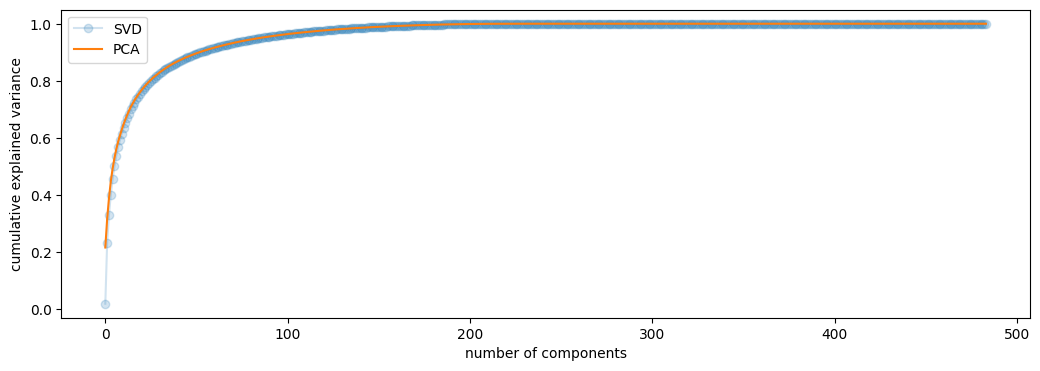

In [11]:
pca_biogpt_large = PCA().fit(biotech_abstract_biogpt_large)
pca_var_biogpt_large = np.cumsum(pca_biogpt_large.explained_variance_ratio_)

svd_content_biogpt_large = TruncatedSVD(n_iter= 25, n_components = 1600 ).fit(biotech_abstract_biogpt_large)
svd_var_biogpt_large = np.cumsum(svd_content_biogpt_large.explained_variance_ratio_)
     
plt.figure(figsize = (12.5,4))
plt.plot(svd_var_biogpt_large, marker = 'o', alpha =0.2)
plt.plot(pca_var_biogpt_large)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.legend(['SVD','PCA'])

In [12]:
print('PCA 100% :',np.where(np.array(pca_var_biogpt_large) >= 0.99)[0][0])
print('SVD 100% :',np.where(np.array(svd_var_biogpt_large) >= 0.99)[0][0])
print('PCA 95% :',np.where(np.array(pca_var_biogpt_large) >= 0.95)[0][0])
print('SVD 95% :',np.where(np.array(svd_var_biogpt_large) >= 0.95)[0][0])
print('PCA 90% :',np.where(np.array(pca_var_biogpt_large) >= 0.90)[0][0])
print('SVD 90% :',np.where(np.array(svd_var_biogpt_large) >= 0.90)[0][0])


PCA 100% : 153
SVD 100% : 154
PCA 95% : 85
SVD 95% : 86
PCA 90% : 52
SVD 90% : 53


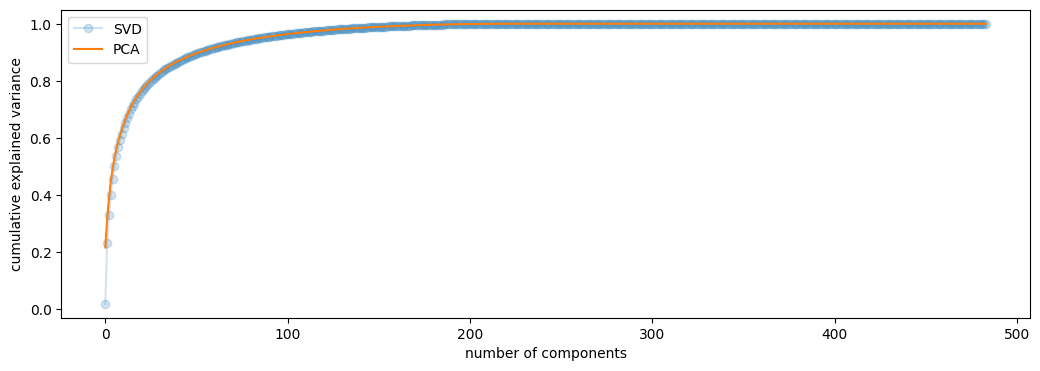

In [13]:
pca_biogpt_large_pubmed_qa = PCA().fit(biotech_abstract_biogpt_large)
pca_var_biogpt_large_pubmed_qa = np.cumsum(pca_biogpt_large_pubmed_qa.explained_variance_ratio_)

svd_content_biogpt_large_pubmed_qa = TruncatedSVD(n_iter= 25, n_components = 1600 ).fit(biotech_abstract_biogpt_large)
svd_var_biogpt_large_pubmed_qa = np.cumsum(svd_content_biogpt_large_pubmed_qa.explained_variance_ratio_)
     
plt.figure(figsize = (12.5,4))
plt.plot(svd_var_biogpt_large_pubmed_qa, marker = 'o', alpha =0.2)
plt.plot(pca_var_biogpt_large_pubmed_qa)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.legend(['SVD','PCA'])

In [14]:
print('PCA 100% :',np.where(np.array(pca_var_biogpt_large_pubmed_qa) >= 0.99)[0][0])
print('SVD 100% :',np.where(np.array(svd_var_biogpt_large_pubmed_qa) >= 0.99)[0][0])
print('PCA 95% :',np.where(np.array(pca_var_biogpt_large_pubmed_qa) >= 0.95)[0][0])
print('SVD 95% :',np.where(np.array(svd_var_biogpt_large_pubmed_qa) >= 0.95)[0][0])
print('PCA 90% :',np.where(np.array(pca_var_biogpt_large_pubmed_qa) >= 0.90)[0][0])
print('SVD 90% :',np.where(np.array(svd_var_biogpt_large_pubmed_qa) >= 0.90)[0][0])

PCA 100% : 153
SVD 100% : 154
PCA 95% : 85
SVD 95% : 86
PCA 90% : 52
SVD 90% : 53
